In [1]:
import sys
sys.path.insert(1, '../')
import math
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import util.registration as register

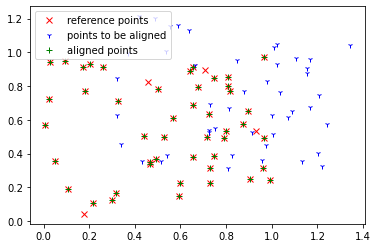

In [2]:
np.random.seed(12345)

# create a set of points to be the reference for ICP
xs = np.random.random_sample((50, 1))
ys = np.random.random_sample((50, 1))
reference_points = np.hstack((xs, ys))

# transform the set of reference points to create a new set of
# points for testing the ICP implementation

# 1. remove some points
points_to_be_aligned = reference_points[1:47]

# 2. apply rotation to the new point set
theta = math.radians(12)
c, s = math.cos(theta), math.sin(theta)
rot = np.array([[c, -s],
                [s, c]])
points_to_be_aligned = np.dot(points_to_be_aligned, rot)

# 3. apply translation to the new point set
points_to_be_aligned += np.array([np.random.random_sample(), np.random.random_sample()])

# run icp
transformation_history, aligned_points = register.iterativeClosestPoint(reference_points, points_to_be_aligned, verbose=True)

# show results
plt.plot(reference_points[:, 0], reference_points[:, 1], 'rx', label='reference points')
plt.plot(points_to_be_aligned[:, 0], points_to_be_aligned[:, 1], 'b1', label='points to be aligned')
plt.plot(aligned_points[:, 0], aligned_points[:, 1], 'g+', label='aligned points')
plt.legend()
plt.show()